In [122]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [123]:
# # 1. Generate some dummy linear data
np.random.seed(42)
X = np.linspace(0, 2, 100).reshape(-1, 1) 

In [124]:
# Adds 1 as a bias and the second one is X
X_b = np.c_[np.ones((100, 1)), X]  # shape: (100, 2)

In [125]:
true_theta = np.array([[1.0], [2.0]])  # Fixed true parameters
z = X_b @ true_theta
p = 1 / (1 + np.exp(-z))
y_binary = (np.random.random((100, 1)) < p).astype(int)  # Add some randomness

In [126]:
# 2. Initialize parameters
learning_rate = 0.1
n_iterations = 1000
m = len(X_b)  # number of samples
print(theta)

[[ 0.49671415]
 [-0.1382643 ]]


In [127]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [128]:
def binary_cross_entropy(y, y_pred):
    # Clip predictions to avoid log(0) errors
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    m = len(y)
    loss = -(1/m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    return loss

## Gradient Descent

In [129]:
def batch_gradient_descent(X_b, y, learning_rate=0.1, n_iterations=1000):
    m, n = X_b.shape
    theta = np.random.randn(n, 1)
    for epoch in range(n_iterations):
        y_pred = sigmoid(X_b @ theta)
        gradients = (1/m) * X_b.T @ (y_pred - y)
        theta -= learning_rate * gradients
        
        if epoch % 100 == 0:
            loss = -np.mean(y * np.log(y_pred + 1e-15) + (1 - y) * np.log(1 - y_pred + 1e-15))
            print(f"Epoch {epoch}, Loss: {loss:.4f}")
    return theta


In [130]:
def stochastic_gradient_descent(X_b, y, learning_rate=0.1, n_epochs=50):
    m, n = X_b.shape
    theta = np.random.randn(n, 1)
    for epoch in range(n_epochs):
        for i in range(m):
            xi = X_b[i:i+1]
            yi = y[i:i+1]
            y_pred = sigmoid(xi @ theta)
            gradients = xi.T @ (y_pred - yi)
            theta -= learning_rate * gradients
            
        if epoch % 100 == 0:
            loss = -np.mean(y * np.log(y_pred + 1e-15) + (1 - y) * np.log(1 - y_pred + 1e-15))
            print(f"Epoch {epoch}, Loss: {loss:.4f}")
    return theta


In [131]:
def minibatch_gradient_descent(X_b, y, learning_rate=0.1, n_epochs=1000, batch_size=32):
    m, n = X_b.shape
    theta = np.random.randn(n, 1)
    for epoch in range(n_epochs):
        indices = np.random.permutation(m)
        X_shuffled = X_b[indices]
        y_shuffled = y[indices]
        
        for i in range(0, m, batch_size):
            xi = X_shuffled[i:i+batch_size]
            yi = y_shuffled[i:i+batch_size]
            y_pred = sigmoid(xi @ theta)
            gradients = (1/len(xi)) * xi.T @ (y_pred - yi)
            theta -= learning_rate * gradients

    return theta


In [132]:
def predict(X_b, theta, threshold=0.5):
    probs = sigmoid(X_b @ theta)
    return (probs >= threshold).astype(int)


In [133]:
theta_batch = batch_gradient_descent(X_b, y_binary)
print(theta_batch)

Epoch 0, Loss: 0.8023
Epoch 100, Loss: 0.2590
Epoch 200, Loss: 0.2529
Epoch 300, Loss: 0.2521
Epoch 400, Loss: 0.2517
Epoch 500, Loss: 0.2515
Epoch 600, Loss: 0.2513
Epoch 700, Loss: 0.2512
Epoch 800, Loss: 0.2511
Epoch 900, Loss: 0.2510
[[1.26262449]
 [1.5064691 ]]


In [134]:
theta_sgd = stochastic_gradient_descent(X_b, y_binary)

print(theta_sgd)


Epoch 0, Loss: 0.2790
[[1.12731461]
 [1.70282567]]


In [135]:
theta_mini = minibatch_gradient_descent(X_b, y_binary)

print(theta_mini)

[[1.14805511]
 [1.65613539]]


## Evaluation

In [136]:
y_pred_batch = predict(X_b, theta_batch)
y_pred_sgd = predict(X_b, theta_sgd)
y_pred_mini = predict(X_b, theta_mini)

In [137]:
# Calculate accuracy
accuracy_batch = np.mean(y_pred_batch == y_binary)
accuracy_sgd = np.mean(y_pred_sgd == y_binary)
accuracy_mini = np.mean(y_pred_mini == y_binary)

print(f"Batch GD Accuracy: {accuracy_batch:.4f}")
print(f"SGD Accuracy: {accuracy_sgd:.4f}")
print(f"Mini-batch GD Accuracy: {accuracy_mini:.4f}")

Batch GD Accuracy: 0.9200
SGD Accuracy: 0.9200
Mini-batch GD Accuracy: 0.9200


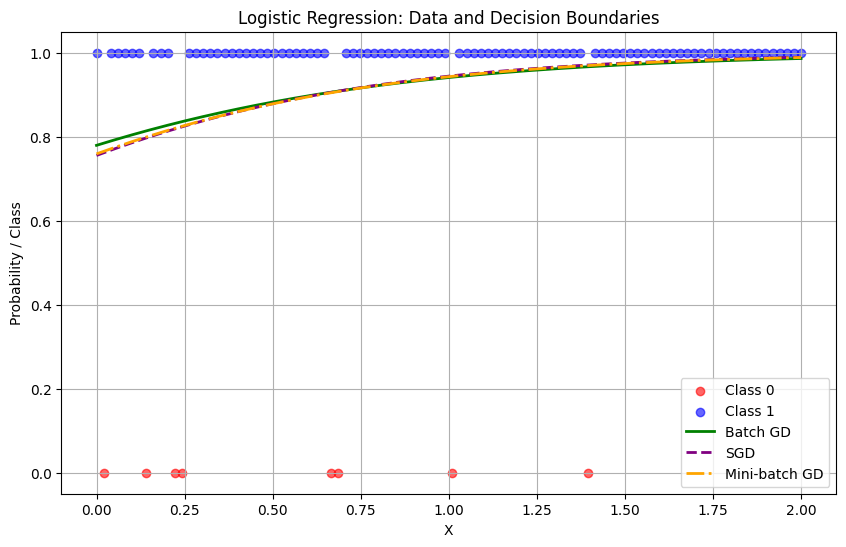

In [138]:
# 9. Plotting
plt.figure(figsize=(10, 6))

# Scatter plot of data points
plt.scatter(X[y_binary.flatten() == 0], y_binary[y_binary.flatten() == 0], color='red', label='Class 0', alpha=0.6)
plt.scatter(X[y_binary.flatten() == 1], y_binary[y_binary.flatten() == 1], color='blue', label='Class 1', alpha=0.6)

# Generate points for smooth sigmoid curves
x_range = np.linspace(0, 2, 200).reshape(-1, 1)
x_range_b = np.c_[np.ones((200, 1)), x_range]

# Sigmoid curves for each model
probs_batch = sigmoid(x_range_b @ theta_batch)
probs_sgd = sigmoid(x_range_b @ theta_sgd)
probs_mini = sigmoid(x_range_b @ theta_mini)

plt.plot(x_range, probs_batch, label='Batch GD', color='green', linewidth=2)
plt.plot(x_range, probs_sgd, label='SGD', color='purple', linestyle='--', linewidth=2)
plt.plot(x_range, probs_mini, label='Mini-batch GD', color='orange', linestyle='-.', linewidth=2)

# Decision boundaries (where p = 0.5, i.e., theta_0 + theta_1 * x = 0)
db_batch = -theta_batch[0] / theta_batch[1]
db_sgd = -theta_sgd[0] / theta_sgd[1]
db_mini = -theta_mini[0] / theta_mini[1]

plt.xlabel('X')
plt.ylabel('Probability / Class')
plt.title('Logistic Regression: Data and Decision Boundaries')
plt.legend()
plt.grid(True)
plt.show()